In [3]:
import requests
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt

headers = {
    'user-agent': 'my-app'
}


def main(url):
    with requests.Session() as req:
        req.headers.update(headers)
        allin = []
        for t in ['AMZN','NFLX', 'AAPL', 'TSLA']:
            params = {
                't': t
            }
            r = req.get(url, params=params)
            df = pd.read_html(r.content, attrs={'id': 'news-table'})[0]
            df[2] = t
            allin.append(df)
        df = pd.concat(allin, ignore_index=True)
        return df
        #print(df[2])
        #df.to_csv('data.csv', index=False)

df = main('https://finviz.com/quote.ashx')
print(df)

                     0                                                  1  \
0    Jan-19-23 01:23PM    Amazon's Smile: Gone After 10 Years Motley Fool   
1              11:59AM  Federal inspectors fine Amazon $60,269 for put...   
2              11:49AM  Amazons cost-cutting measures a positive first...   
3              11:04AM  Amazon to Wind Down Charity-Donation Program A...   
4              10:55AM  Disney Should Put on A Better Show without Pel...   
..                 ...                                                ...   
407            07:40PM  Jury selected for Elon Musk trial about 2018 T...   
408            07:31PM  Musks Tesla funding secured trial to begin aft...   
409            07:31PM  Elon Musks Tesla funding secured trial to begi...   
410            05:42PM  No Home Court Edge for Musk in 'Funding Secure...   
411            05:25PM  This Tweet Led to a Lawsuit Against Elon Musk ...   

        2  
0    AMZN  
1    AMZN  
2    AMZN  
3    AMZN  
4    AMZN  
.. 

In [5]:
###create loop to define day versus time###
day = 0 #define to be used in loop
time = 0 #defined to be used in loop
print(day)

parsed_data = []
for i, row in df.iterrows():
    title = df[1].iloc[i]
    ticker = df[2].iloc[i]
    date_data = df.iloc[i][0].split(' ')
    if len(date_data) == 2:
        day = date_data[0]
        time = date_data[1]
    else:
        time = date_data[0]

        parsed_data.append([day, time, ticker, title])

data = pd.DataFrame(parsed_data, columns=['date', 'time', 'ticker', 'title'])
data.drop(index=data.index[0], axis=0, inplace=True)
        

0


<Figure size 10000x8000 with 0 Axes>

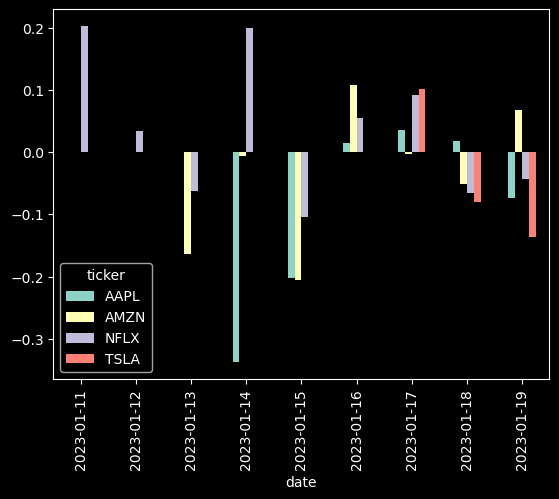

In [6]:
###"""apply sentiment analysis"""
        
vader = SentimentIntensityAnalyzer()

#defining lambda function
#compound is used to ignore "negative, positive, neutral" statements and only provide value
f = lambda title: vader.polarity_scores(title)['compound'] 
data['compound'] = data['title'].apply(f)
data['date'] = pd.to_datetime(data['date']).dt.date

plt.figure(figsize=(100,80))
plt.style.use('dark_background') #altered look
mean_df = data.groupby(['ticker', 'date']).mean().unstack()
mean_df = mean_df.xs('compound', axis="columns").transpose()
mean_df.plot(kind='bar')
plt.show()

<Figure size 1000x800 with 0 Axes>

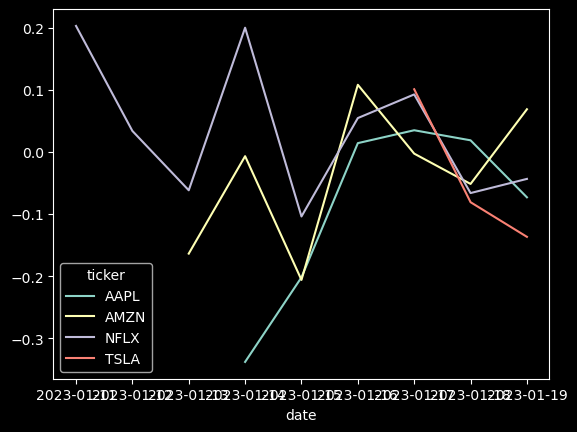

In [7]:
plt.figure(figsize=(10,8))
plt.style.use('dark_background') #altered look
mean_df = data.groupby(['ticker', 'date']).mean().unstack()
mean_df = mean_df.xs('compound', axis="columns").transpose()
mean_df.plot(kind='line')
plt.show()